<a href="https://colab.research.google.com/github/Gonzales-James/CpE-AIML/blob/main/Perceptron_Algorithm/58034_Lab06v1_Henerawr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About the Dataset**

***Purpose of the Dataset*** 

The purpose of this dataset is to locate the lumps of the patient caused by the breast cancer. It also aims to observe which features will be most helpful in predicting malignant or benign cancer and to see general trends that may aid in model selection and hyper parameter selection. This dataset is used to classify whether breast cancer is benign or malignant.

\\

***Need statement*** 

One of the leading cancer diseases that is developed in many countries is breast cancer. The death toll dues to breast cancer have increased drastically in last few decades. The main issue that is relevant to its cure is early recognition of the disease. Early recognition of this disease can increase the survival rate of the women who are being diagnosed with breast cancer. One solution is integrating Data Analytics in to the medical field in order to resolve this issue.   

\\

***Significance*** 

The significance of this dataset is to recognize the disease early. Early diagnosis or recognition of breast cancer can increase the chance of survival and the patient can have their timely clinical treatment. With early recognition and classification of the disease can avoid unnecessary treatments of the patient. Classification and data mining methods are a productive process to classify and predict data especially in the medical field.

# Perceptron Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
X, y = load_breast_cancer(return_X_y=True)

In [4]:
X = X[::,1:3]

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

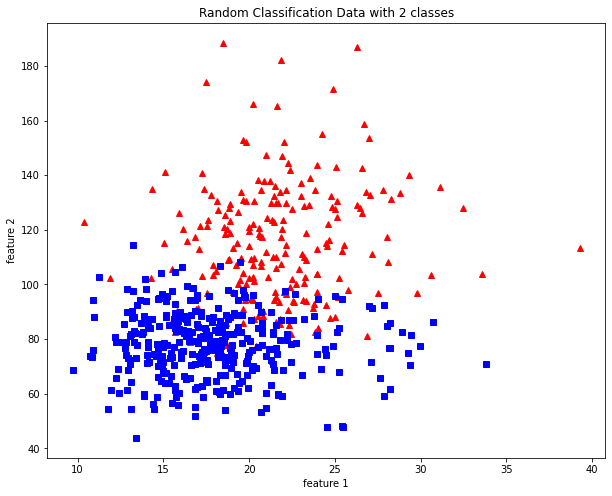

In [5]:
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [6]:
def step_func(z):
        return 1.0 if (z > 0) else 0.0

In [7]:
def perceptron(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

In [8]:
def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(x1, x2, 'y-')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm')

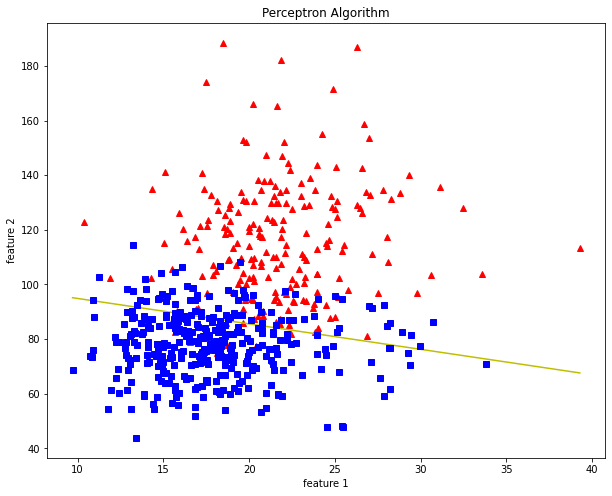

In [9]:
theta, n_miss_list = perceptron(X, y, 0.05, 2000)
plot_decision_boundary(X, theta)